**Cats and Dogs from another Gmail account -> www.sadafshafi.in@gmail.com**

**STARTING GPU**

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
2.8513801090000044
GPU (s):
0.04213075799999899
GPU speedup over CPU: 67x


In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-04-10 14:42:39--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.128, 172.217.7.240, 172.217.8.16, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   227MB/s    in 0.3s    

2021-04-10 14:42:39 (227 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [5]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')



['cat.673.jpg', 'cat.291.jpg', 'cat.25.jpg', 'cat.665.jpg', 'cat.183.jpg', 'cat.655.jpg', 'cat.881.jpg', 'cat.491.jpg', 'cat.12.jpg', 'cat.863.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']
total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
# from tensorflow.python.keras import backend
# from tensorflow.python.keras.datasets.cifar import load_batch
# from tensorflow.python.keras.utils.data_utils import get_file
# from tensorflow.python.util.tf_export import keras_export

# dirname = 'cifar-10-batches-py'
# origin = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip '
# path = get_file(
#     dirname,
#     origin=origin,
#     untar=True,
#     file_hash=
#     '6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce')

# num_train_samples = 50000

# x_train = np.empty((num_train_samples, 3, 32, 32), dtype='uint8')
# y_train = np.empty((num_train_samples,), dtype='uint8')

# for i in range(1, 6):
#   fpath = os.path.join(path, 'data_batch_' + str(i))
#   (x_train[(i - 1) * 10000:i * 10000, :, :, :],
#     y_train[(i - 1) * 10000:i * 10000]) = load_batch(fpath)

# fpath = os.path.join(path, 'test_batch')
# x_test, y_test = load_batch(fpath)

# y_train = np.reshape(y_train, (len(y_train), 1))
# y_test = np.reshape(y_test, (len(y_test), 1))

# if backend.image_data_format() == 'channels_last':
#   x_train = x_train.transpose(0, 2, 3, 1)
#   x_test = x_test.transpose(0, 2, 3, 1)

# x_test = x_test.astype(x_train.dtype)
# y_test = y_test.astype(y_train.dtype)



In [7]:
def Plotter(acc,val_acc,loss,val_loss,l_r):
  
  plt.plot(acc, label='accuracy')
  plt.plot(val_acc, label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()


  plt.plot(loss, label='loss')
  plt.plot(val_loss, label = 'val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.legend(loc='lower right')
  plt.show()

  plt.plot(l_r, label='Learning Rate')
  plt.xlabel('Epoch')
  plt.ylabel('LR')
  plt.legend(loc='lower right')
  plt.show()

In [10]:
cat_model().summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0   

**Test for LR**

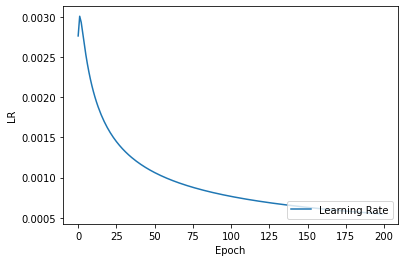

In [ ]:
lr = []
epoo=200
from matplotlib import pyplot as plt
for z,batch_size in zip(range(1,epoo+1),range(5,10000,5)):


  LR = (batch_size)/((z+1)**(3/2)*80)
  LR=LR/8
  lr.append(LR)

plt.plot(lr, label='Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('LR')
plt.legend(loc='lower right')
plt.show()

In [9]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

def cat_model():

  img_input = layers.Input(shape=(150, 150, 3))

  x = layers.Conv2D(16, 3, activation='relu')(img_input)
  x = layers.MaxPooling2D(2)(x)
  x = layers.Conv2D(32, 3, activation='relu')(x)
  x = layers.MaxPooling2D(2)(x)
  x = layers.Conv2D(64, 3, activation='relu')(x)
  x = layers.MaxPooling2D(2)(x)
  x = layers.Flatten()(x)
  x = layers.Dense(512, activation='relu')(x)

  output = layers.Dense(1, activation='sigmoid')(x)

  model = Model(img_input, output)



  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(lr=0.001),
                metrics=['accuracy'])
  
  return model 

model = cat_model()

In [ ]:
# baseline model with dropout for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.5))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
	return model

model = define_model()

In [ ]:
# epoch=1
# for i in range(5,100,5):

#   print("epoch ",epoch)
#   epoch+=1
#   train_generator.batch_size=i
#   validation_generator.batch_size=i

# train_generator.batch_size=i
# validation_generator.batch_size=i

history = model.fit(
      train_generator,
      epochs=200,
      validation_data=validation_generator,
      verbose=1)

Epoch 1/200
100/100 [==============================] - 11s 89ms/step - loss: 5.7814 - accuracy: 0.4785 - val_loss: 0.6933 - val_accuracy: 0.4990
Epoch 2/200
100/100 [==============================] - 9s 88ms/step - loss: 0.6943 - accuracy: 0.4960 - val_loss: 0.6914 - val_accuracy: 0.4940
Epoch 3/200
100/100 [==============================] - 9s 87ms/step - loss: 0.6830 - accuracy: 0.5665 - val_loss: 0.6829 - val_accuracy: 0.5850
Epoch 4/200
100/100 [==============================] - 9s 90ms/step - loss: 0.6643 - accuracy: 0.5914 - val_loss: 0.6618 - val_accuracy: 0.6220
Epoch 5/200
100/100 [==============================] - 9s 89ms/step - loss: 0.6061 - accuracy: 0.6597 - val_loss: 0.6830 - val_accuracy: 0.5600
Epoch 6/200
100/100 [==============================] - 9s 90ms/step - loss: 0.5934 - accuracy: 0.6671 - val_loss: 0.6550 - val_accuracy: 0.6370
Epoch 7/200
100/100 [==============================] - 9s 91ms/step - loss: 0.5405 - accuracy: 0.7050 - val_loss: 0.6844 - val_accuracy

**Normal default fit** : LR and Batch Size default

In [ ]:
acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']

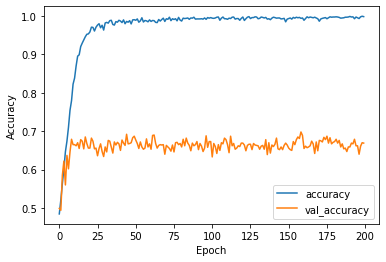

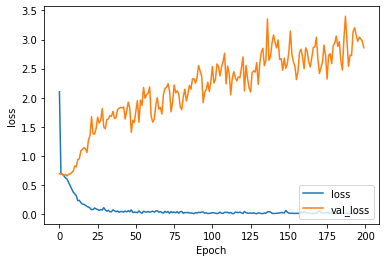

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.show()

**LR ∝ BS/Epoch**

In [ ]:
model = cat_model()

from keras.callbacks import LearningRateScheduler

LR = 0.01
epoch = 1
batch_size = 100

val_acc = []
acc = []
val_loss = []
loss = []
l_r = []

num = 0

for z,batch_size in zip(range(1,epoo+1),range(5,10000,5)):

  LR = (batch_size)/(((z+1)**(3/2))*80)
  LR=LR/8

  print("\n\nepoch {z}, Learning Rate {LR}, Batch Size  {batch_size} "
                    .format(z=z,LR=LR,batch_size=batch_size))

  def set_LR(epoch,lr):
    global LR
    global l_r
    l_r.append(LR)
    return LR

  call = [ LearningRateScheduler(set_LR,verbose=1) ]


  train_generator.batch_size=batch_size
  validation_generator.batch_size=batch_size

  history = model.fit(
            train_generator, 
            validation_data=(validation_generator),
            epochs=epoch,
            callbacks=call
            )



  acc.append(history.history['accuracy'])
  val_acc.append(history.history['val_accuracy'])
  loss.append(history.history['loss'])
  val_loss.append(history.history['val_loss'])





epoch 1, Learning Rate 0.002762135864009951, Batch Size  5 

Epoch 00001: LearningRateScheduler reducing learning rate to 0.002762135864009951.
400/400 [==============================] - 11s 26ms/step - loss: 1.9381 - accuracy: 0.5153 - val_loss: 0.6801 - val_accuracy: 0.5900


epoch 2, Learning Rate 0.003007032652029301, Batch Size  10 

Epoch 00001: LearningRateScheduler reducing learning rate to 0.003007032652029301.
200/200 [==============================] - 9s 43ms/step - loss: 0.6957 - accuracy: 0.5645 - val_loss: 0.6386 - val_accuracy: 0.6530


epoch 3, Learning Rate 0.0029296875, Batch Size  15 

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0029296875.
134/134 [==============================] - 9s 63ms/step - loss: 0.6512 - accuracy: 0.6600 - val_loss: 0.6125 - val_accuracy: 0.6690


epoch 4, Learning Rate 0.002795084971874737, Batch Size  20 

Epoch 00001: LearningRateScheduler reducing learning rate to 0.002795084971874737.
100/100 [=======================

In [ ]:
acc_2 = acc
val_acc_2 = val_acc

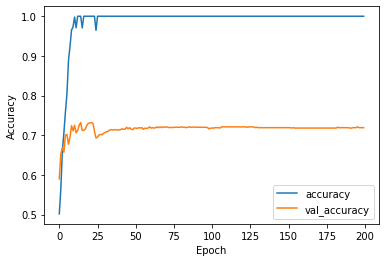

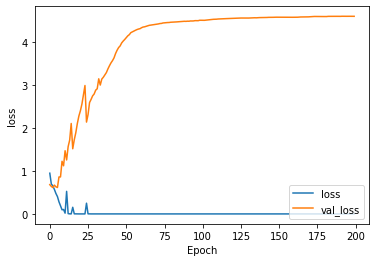

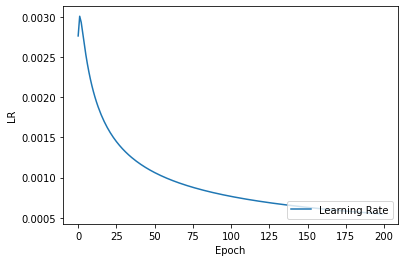

In [ ]:
Plotter(acc,val_acc,loss,val_loss,l_r)

**Keeping batch size constant**

In [ ]:
model = cat_model()

from keras.callbacks import LearningRateScheduler

LR = 0.01
epoch = 1
batch_size = 100

val_acc = []
acc = []
val_loss = []
loss = []
l_r = []
for z,batch_size in zip(range(1,epoo+1),range(5,10000,5)):

  LR = (batch_size)/(((z+1)**(3/2))*80)
  LR=LR/8

  print("\n\nepoch {z}, Learning Rate {LR}, Batch Size  {batch_size} "
                    .format(z=z,LR=LR,batch_size=batch_size))

  def set_LR(epoch,lr):
    global LR
    global l_r
    l_r.append(LR)
    return LR

  call = [ LearningRateScheduler(set_LR,verbose=1) ]

  # train_generator.batch_size=batch_size
  # validation_generator.batch_size=batch_size

  history = model.fit(
            train_generator, 
            validation_data=(validation_generator),
            epochs=epoch,
            callbacks=call
            )



  acc.append(history.history['accuracy'])
  val_acc.append(history.history['val_accuracy'])
  loss.append(history.history['loss'])
  val_loss.append(history.history['val_loss'])



epoch 1, Learning Rate 0.002762135864009951, Batch Size  5 

Epoch 00001: LearningRateScheduler reducing learning rate to 0.002762135864009951.
2/2 [==============================] - 11s 8s/step - loss: 7.8702 - accuracy: 0.4690 - val_loss: 9.3730 - val_accuracy: 0.5000


epoch 2, Learning Rate 0.003007032652029301, Batch Size  10 

Epoch 00001: LearningRateScheduler reducing learning rate to 0.003007032652029301.
2/2 [==============================] - 10s 8s/step - loss: 4.9840 - accuracy: 0.4975 - val_loss: 0.7721 - val_accuracy: 0.5000


epoch 3, Learning Rate 0.0029296875, Batch Size  15 

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0029296875.
2/2 [==============================] - 10s 8s/step - loss: 0.7347 - accuracy: 0.5005 - val_loss: 0.6913 - val_accuracy: 0.5010


epoch 4, Learning Rate 0.002795084971874737, Batch Size  20 

Epoch 00001: LearningRateScheduler reducing learning rate to 0.002795084971874737.
2/2 [==============================] - 10s 7s/st

In [ ]:
acc_3 = acc
val_acc_3 = val_acc

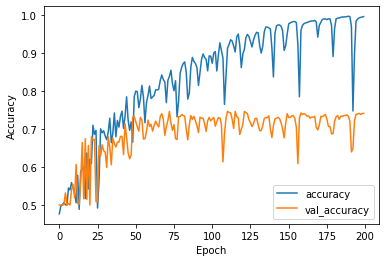

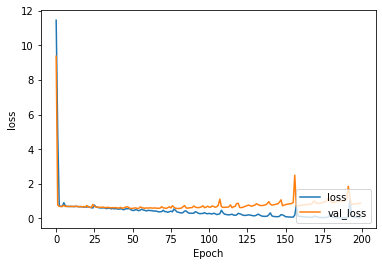

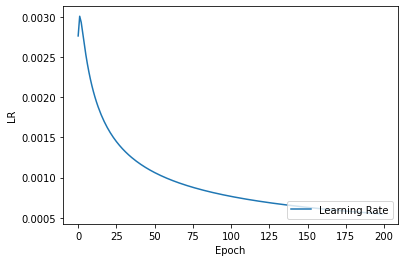

In [ ]:
Plotter(acc,val_acc,loss,val_loss,l_r)

**LR constant**

In [ ]:
model = cat_model()

from keras.callbacks import LearningRateScheduler

LR = 0.01
epoch = 1
batch_size = 100

val_acc = []
acc = []
val_loss = []
loss = []
l_r = []
for z,batch_size in zip(range(1,epoo+1),range(5,10000,5)):

  LR = (batch_size)/(((z+1)**(3/2))*80)
  LR=LR/8

  print("\n\nepoch {z}, Learning Rate {LR}, Batch Size  {batch_size} "
                    .format(z=z,LR=LR,batch_size=batch_size))

  def set_LR(epoch,lr):
    global LR
    global l_r
    l_r.append(LR)
    return LR

  call = [ LearningRateScheduler(set_LR,verbose=1) ]

  train_generator.batch_size=batch_size
  validation_generator.batch_size=batch_size

  history = model.fit(
            train_generator, 
            validation_data=(validation_generator),
            epochs=epoch,
            # callbacks=call
            )



  acc.append(history.history['accuracy'])
  val_acc.append(history.history['val_accuracy'])
  loss.append(history.history['loss'])
  val_loss.append(history.history['val_loss'])



epoch 1, Learning Rate 0.002762135864009951, Batch Size  5 
400/400 [==============================] - 10s 24ms/step - loss: 0.8934 - accuracy: 0.5342 - val_loss: 0.8771 - val_accuracy: 0.5340


epoch 2, Learning Rate 0.003007032652029301, Batch Size  10 
200/200 [==============================] - 9s 43ms/step - loss: 0.6028 - accuracy: 0.6870 - val_loss: 0.5907 - val_accuracy: 0.6850


epoch 3, Learning Rate 0.0029296875, Batch Size  15 
134/134 [==============================] - 8s 63ms/step - loss: 0.5281 - accuracy: 0.7420 - val_loss: 0.5696 - val_accuracy: 0.7090


epoch 4, Learning Rate 0.002795084971874737, Batch Size  20 
100/100 [==============================] - 8s 84ms/step - loss: 0.4477 - accuracy: 0.7845 - val_loss: 0.5511 - val_accuracy: 0.7240


epoch 5, Learning Rate 0.0026578664743741078, Batch Size  25 
80/80 [==============================] - 8s 105ms/step - loss: 0.3678 - accuracy: 0.8355 - val_loss: 0.7033 - val_accuracy: 0.6990


epoch 6, Learning Rate 0.002531

In [ ]:
acc_4 = acc
val_acc_4 = val_acc

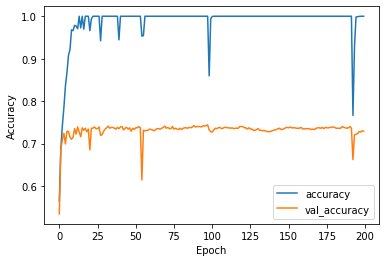

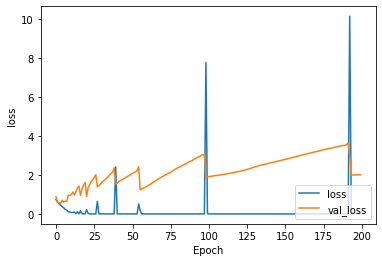

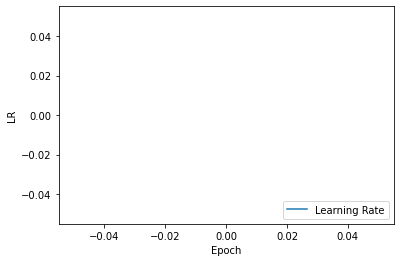

In [ ]:
Plotter(acc,val_acc,loss,val_loss,l_r)

**Plotting all of them**

---



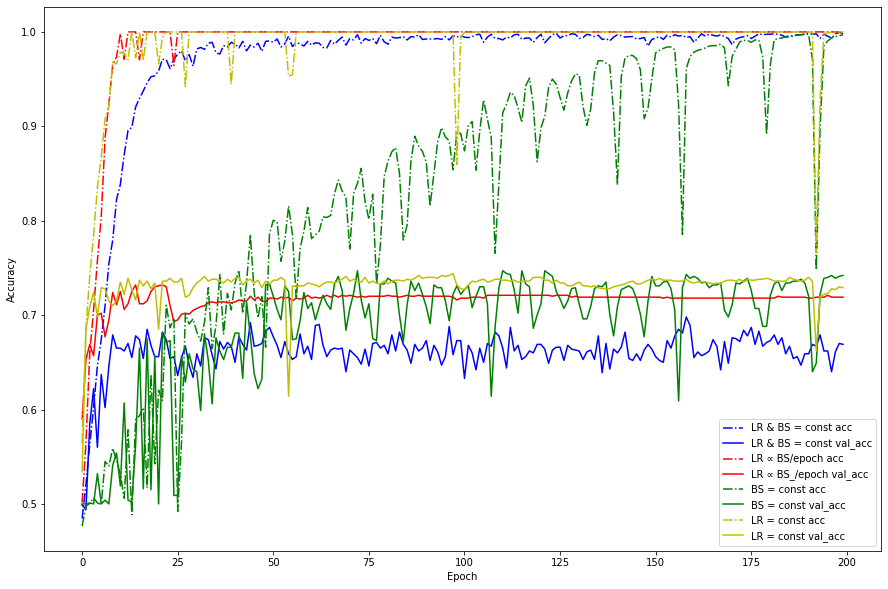

In [ ]:
plt.figure(figsize=(15, 10))

plt.plot(acc_1, label='LR & BS = const acc',ls='-.',c='b')
plt.plot(val_acc_1, label = 'LR & BS = const val_acc',c='b')
plt.plot(acc_2, label='LR ∝ BS/epoch acc',ls='-.',c='r')
plt.plot(val_acc_2, label = 'LR ∝ BS_/epoch val_acc',c='r')
plt.plot(acc_3, label='BS = const acc',ls='-.',c='g')
plt.plot(val_acc_3, label = 'BS = const val_acc',c='g')
plt.plot(acc_4, label='LR = const acc',ls='-.',c='y')
plt.plot(val_acc_4, label = 'LR = const val_acc',c='y')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


# case4_fashion_acc,case4_fashion_val_acc0

In [ ]:
acc_1_dif = []
for i in range(len(acc_1)): acc_1_dif.append(acc_1[i] - val_acc_1[i]) 
acc_2_dif = []
for i in range(len(acc_2)): acc_2_dif.append(acc_2[i][0] - val_acc_2[i][0]) 
acc_3_dif = []
for i in range(len(acc_3)): acc_3_dif.append(acc_3[i][0] - val_acc_3[i][0]) 
acc_4_dif = []
for i in range(len(acc_4)): acc_4_dif.append(acc_4[i][0] - val_acc_4[i][0]) 

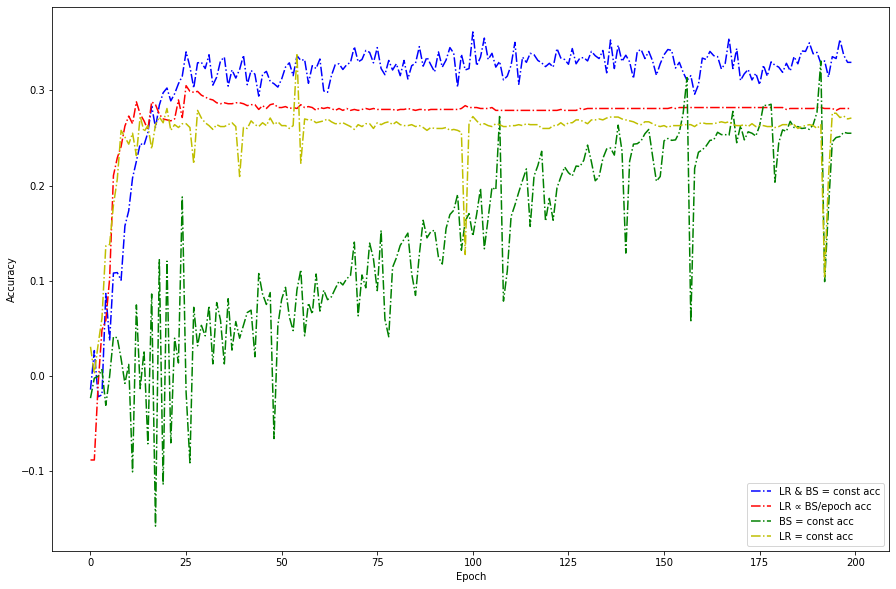

In [ ]:
plt.figure(figsize=(15, 10))

plt.plot(acc_1_dif, label='LR & BS = const acc',ls='-.',c='b')
# plt.plot(val_acc_1, label = 'LR & BS = const val_acc',c='b')
plt.plot(acc_2_dif, label='LR ∝ BS/epoch acc',ls='-.',c='r')
# plt.plot(val_acc_2, label = 'LR ∝ BS_/epoch val_acc',c='r')
plt.plot(acc_3_dif, label='BS = const acc',ls='-.',c='g')
# plt.plot(val_acc_3, label = 'BS = const val_acc',c='g')
plt.plot(acc_4_dif, label='LR = const acc',ls='-.',c='y')
# plt.plot(val_acc_4, label = 'LR = const val_acc',c='y')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [2]:
import time
import json
import pprint
import hashlib
import struct
import re
import base64
import httplib
import sys
from multiprocessing import Process

ERR_SLEEP = 15
MAX_NONCE = 1000000L

settings = {}
pp = pprint.PrettyPrinter(indent=4)

class BitcoinRPC:
	OBJID = 1

	def __init__(self, host, port, username, password):
		authpair = "%s:%s" % (username, password)
		self.authhdr = "Basic %s" % (base64.b64encode(authpair))
		self.conn = httplib.HTTPConnection(host, port, False, 30)
	def rpc(self, method, params=None):
		self.OBJID += 1
		obj = { 'version' : '1.1',
			'method' : method,
			'id' : self.OBJID }
		if params is None:
			obj['params'] = []
		else:
			obj['params'] = params
		self.conn.request('POST', '/', json.dumps(obj),
			{ 'Authorization' : self.authhdr,
			  'Content-type' : 'application/json' })

		resp = self.conn.getresponse()
		if resp is None:
			print "JSON-RPC: no response"
			return None

		body = resp.read()
		resp_obj = json.loads(body)
		if resp_obj is None:
			print "JSON-RPC: cannot JSON-decode body"
			return None
		if 'error' in resp_obj and resp_obj['error'] != None:
			return resp_obj['error']
		if 'result' not in resp_obj:
			print "JSON-RPC: no result in object"
			return None

		return resp_obj['result']
	def getblockcount(self):
		return self.rpc('getblockcount')
	def getwork(self, data=None):
		return self.rpc('getwork', data)

def uint32(x):
	return x & '0xffffffffL'

def bytereverse(x):
	return uint32(( ((x) << 24) | (((x) << 8) & 0x00ff0000) |
			(((x) >> 8) & 0x0000ff00) | ((x) >> 24) ))

def bufreverse(in_buf):
	out_words = []
	for i in range(0, len(in_buf), 4):
		word = struct.unpack('@I', in_buf[i:i+4])[0]
		out_words.append(struct.pack('@I', bytereverse(word)))
	return ''.join(out_words)

def wordreverse(in_buf):
	out_words = []
	for i in range(0, len(in_buf), 4):
		out_words.append(in_buf[i:i+4])
	out_words.reverse()
	return ''.join(out_words)

class Miner:
	def __init__(self, id):
		self.id = id
		self.max_nonce = MAX_NONCE

	def work(self, datastr, targetstr):
		# decode work data hex string to binary
		static_data = datastr.decode('hex')
		static_data = bufreverse(static_data)

		# the first 76b of 80b do not change
		blk_hdr = static_data[:76]

		# decode 256-bit target value
		targetbin = targetstr.decode('hex')
		targetbin = targetbin[::-1]	# byte-swap and dword-swap
		targetbin_str = targetbin.encode('hex')
		target = long(targetbin_str, 16)

		# pre-hash first 76b of block header
		static_hash = hashlib.sha256()
		static_hash.update(blk_hdr)

		for nonce in xrange(self.max_nonce):

			# encode 32-bit nonce value
			nonce_bin = struct.pack("<I", nonce)

			# hash final 4b, the nonce value
			hash1_o = static_hash.copy()
			hash1_o.update(nonce_bin)
			hash1 = hash1_o.digest()

			# sha256 hash of sha256 hash
			hash_o = hashlib.sha256()
			hash_o.update(hash1)
			hash = hash_o.digest()

			# quick test for winning solution: high 32 bits zero?
			if hash[-4:] != '\0\0\0\0':
				continue

			# convert binary hash to 256-bit Python long
			hash = bufreverse(hash)
			hash = wordreverse(hash)

			hash_str = hash.encode('hex')
			l = long(hash_str, 16)

			# proof-of-work test:  hash < target
			if l < target:
				print time.asctime(), "PROOF-OF-WORK found: %064x" % (l,)
				return (nonce + 1, nonce_bin)
			else:
				print time.asctime(), "PROOF-OF-WORK false positive %064x" % (l,)
#				return (nonce + 1, nonce_bin)

		return (nonce + 1, None)

	def submit_work(self, rpc, original_data, nonce_bin):
		nonce_bin = bufreverse(nonce_bin)
		nonce = nonce_bin.encode('hex')
		solution = original_data[:152] + nonce + original_data[160:256]
		param_arr = [ solution ]
		result = rpc.getwork(param_arr)
		print time.asctime(), "--> Upstream RPC result:", result

	def iterate(self, rpc):
		work = rpc.getwork()
		if work is None:
			time.sleep(ERR_SLEEP)
			return
		if 'data' not in work or 'target' not in work:
			time.sleep(ERR_SLEEP)
			return

		time_start = time.time()

		(hashes_done, nonce_bin) = self.work(work['data'],
						     work['target'])

		time_end = time.time()
		time_diff = time_end - time_start

		self.max_nonce = long(
			(hashes_done * settings['scantime']) / time_diff)
		if self.max_nonce > 0xfffffffaL:
			self.max_nonce = 0xfffffffaL

		if settings['hashmeter']:
			print "HashMeter(%d): %d hashes, %.2f Khash/sec" % (
			      self.id, hashes_done,
			      (hashes_done / 1000.0) / time_diff)

		if nonce_bin is not None:
			self.submit_work(rpc, work['data'], nonce_bin)

	def loop(self):
		rpc = BitcoinRPC(settings['host'], settings['port'],
				 settings['rpcuser'], settings['rpcpass'])
		if rpc is None:
			return

		while True:
			self.iterate(rpc)

def miner_thread(id):
	miner = Miner(id)
	miner.loop()

if __name__ == '__main__':
	if len(sys.argv) != 2:
		print "Usage: pyminer.py CONFIG-FILE"
		sys.exit(1)

	f = open(sys.argv[1])
	for line in f:
		# skip comment lines
		m = re.search('^\s*#', line)
		if m:
			continue

		# parse key=value lines
		m = re.search('^(\w+)\s*=\s*(\S.*)$', line)
		if m is None:
			continue
		settings[m.group(1)] = m.group(2)
	f.close()

	if 'host' not in settings:
		settings['host'] = '127.0.0.1'
	if 'port' not in settings:
		settings['port'] = 8332
	if 'threads' not in settings:
		settings['threads'] = 1
	if 'hashmeter' not in settings:
		settings['hashmeter'] = 0
	if 'scantime' not in settings:
		settings['scantime'] = 30L
	if 'rpcuser' not in settings or 'rpcpass' not in settings:
		print "Missing username and/or password in cfg file"
		sys.exit(1)

	settings['port'] = int(settings['port'])
	settings['threads'] = int(settings['threads'])
	settings['hashmeter'] = int(settings['hashmeter'])
	settings['scantime'] = long(settings['scantime'])

	thr_list = []
	for thr_id in range(settings['threads']):
		p = Process(target=miner_thread, args=(thr_id,))
		p.start()
		thr_list.append(p)
		time.sleep(1)			# stagger threads

	print settings['threads'], "mining threads started"

	print time.asctime(), "Miner Starts - %s:%s" % (settings['host'], settings['port'])
	try:
		for thr_proc in thr_list:
			thr_proc.join()
	except KeyboardInterrupt:
		pass
	print time.asctime(), "Miner Stops - %s:%s" % (settings['host'], settings['port'])

SyntaxError: ignored